<a href="https://colab.research.google.com/github/LinsSandra/Colab-DIO/blob/main/Colab-DIO/ProjetoDIO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando a biblioteca pandas
import pandas as pd


In [ ]:
#Importando as planilhas de excel para o colab
df1=pd.read_excel("/content/drive/MyDrive/Aracaju.xlsx")
df2=pd.read_excel("/content/drive/MyDrive/Fortaleza.xlsx")
df3=pd.read_excel("/content/drive/MyDrive/Natal.xlsx")
df4=pd.read_excel("/content/drive/MyDrive/Recife.xlsx")
df5=pd.read_excel("/content/drive/MyDrive/Salvador.xlsx")

In [ ]:
#Concatenar as planilhas de excel
df=pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Exibindo as cinco primeiras linhas da planilha
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Trouxe 10 amostras de dados de minha planilha
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
20,Aracaju,2018-01-01,39.86,1522,9
4,Fortaleza,2019-01-01,14.25,1004,6
175,Natal,2019-01-02,16.53,1036,2
61,Salvador,2019-01-01,4.54,1036,3
77,Natal,2019-04-01,426.00,853,3
139,Recife,2019-03-02,141.16,980,7
138,Fortaleza,2019-03-02,150.38,983,6
33,Salvador,2019-01-01,144.19,1035,2
239,Salvador,2019-01-03,161.41,1037,3
96,Salvador,2019-01-01,42.94,1034,3


In [ ]:
#Verifica o tipo de dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dados da coluna "LojaId"
df["LojaID"]=df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#Criando a coluna de Receitas
df["Receitas"]=df["Vendas"].mul(df["Qtde"])

In [ ]:
#Trazendo as cinco primeiras linhas do planilha, onde ele considera a primeira linha na posição zero
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Soma das recceitas por cidade
df.groupby("Cidade")["Receitas"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receitas, dtype: float64

In [ ]:
#Ordenando as receitas do maior para o menor
df.sort_values("Receitas", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [ ]:
#Transformando o valor da coluna data de inteiro para data
df["Data"]=pd.to_datetime(df["Data"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receitas"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_Janeiro_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_Janeiro_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda
127,Recife,2019-03-02,39.56,982,8,316.48,2019
123,Fortaleza,2019-03-02,20.22,981,6,121.32,2019
74,Natal,2019-03-10,303.00,854,3,909.00,2019
137,Recife,2019-03-02,51.99,983,3,155.97,2019
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019
127,Fortaleza,2019-03-02,39.56,982,8,316.48,2019
129,Recife,2019-03-02,35.34,982,7,247.38,2019
115,Recife,2019-03-02,12.23,981,3,36.69,2019
117,Fortaleza,2019-03-02,15.42,983,8,123.36,2019
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019


In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.head()



,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,mes_venda,dia_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1


In [ ]:
#Filtrando as vendas de 2019 do mês de Janeiro
vendas_Janeiro_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_Janeiro_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,mes_venda,dia_venda
113,Recife,2019-03-02,38.63,980,2,77.26,2019,3,2
66,Natal,2019-03-24,559.00,853,2,1118.00,2019,3,24
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2
140,Fortaleza,2019-03-02,166.89,983,5,834.45,2019,3,2
130,Fortaleza,2019-03-02,12.36,983,4,49.44,2019,3,2
74,Natal,2019-03-10,303.00,854,3,909.00,2019,3,10
121,Recife,2019-03-02,41.55,981,3,124.65,2019,3,2
124,Recife,2019-03-02,47.98,983,7,335.86,2019,3,2
114,Salvador,2019-03-02,25.52,1034,1,25.52,2019,3,2
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2


In [ ]:
#Total vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

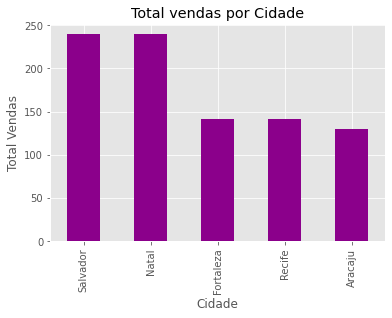

In [ ]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="darkmagenta")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alterando o estilo
plt.style.use("ggplot")

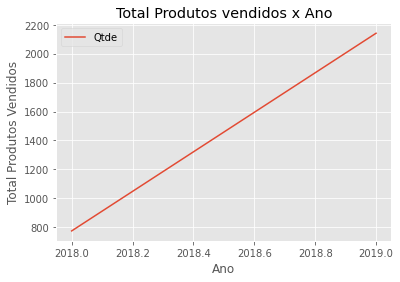

In [ ]:
df.groupby(df["Ano_Venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x Ano")
plt.xlabel("Ano")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [ ]:
df_2019.groupby(df_2019["LojaID"])["Qtde"].sum()

LojaID
852      32
853      42
854      52
980     184
981     131
982     210
983     312
1002    116
1003     71
1004    103
1005     90
1034    129
1035    206
1036    234
1037    201
1520     12
1522     12
1523      4
Name: Qtde, dtype: int64

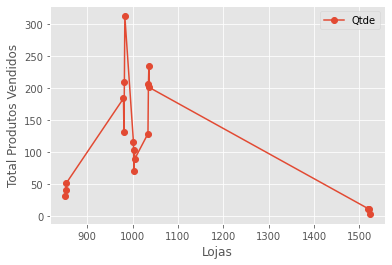

In [ ]:
#Total produtos vendidos por Loja
df_2019.groupby(df_2019["LojaID"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Lojas")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

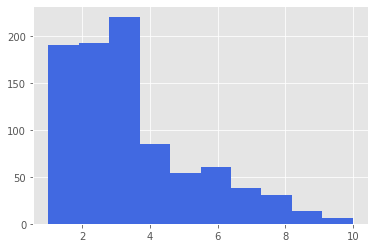

In [ ]:
#Hisograma
plt.hist(df["Qtde"], color="royalblue");

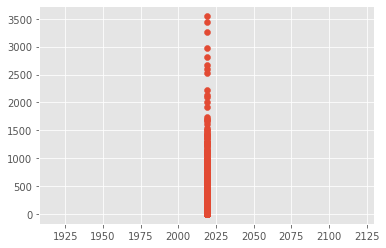

In [ ]:
plt.scatter(x=df_2019["Ano_Venda"], y = df_2019["Receitas"]);